In [1]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image
from image_gen import ImageCollector

In [2]:
client = storage.Client()
# https://console.cloud.google.com/storage/browser/[bucket-id]/
bucket = client.get_bucket('inpainting-final-project')

In [3]:
bucket

<Bucket: inpainting-final-project>

In [4]:
blobs = bucket.list_blobs(prefix='images/CelebA/img_align_celeba/')
images = [] 

try:
    for blob in blobs:
        blob = bucket.get_blob(blob.name)
        s = blob.download_as_string()
        img = Image.open(io.BytesIO(s))
        
        #resize the image to (64,64,3) and normalize it to between -1 and 1
        resized_img = cv2.resize(np.asarray(img),(64,64))/127.5-1.0
        
        if resized_img.shape == (64,64,3):
            images.append(resized_img)
except:
    pass
 

In [5]:
#check the number of images 
len(images)

107838

In [8]:
#show an example image matrix 
images[0]

array([[[ 0.98431373,  0.81176471,  0.52156863],
        [ 0.98431373,  0.81176471,  0.52156863],
        [ 0.98431373,  0.81176471,  0.52156863],
        ...,
        [ 0.4745098 ,  0.24705882, -0.21568627],
        [ 1.        ,  0.8745098 ,  0.6       ],
        [ 0.99215686,  0.86666667,  0.74117647]],

       [[ 0.98431373,  0.81176471,  0.52156863],
        [ 0.98431373,  0.81176471,  0.52156863],
        [ 0.98431373,  0.81176471,  0.52156863],
        ...,
        [ 0.56862745,  0.34117647, -0.05098039],
        [ 0.97647059,  0.85882353,  0.63137255],
        [ 0.98431373,  0.85882353,  0.73333333]],

       [[ 0.98431373,  0.81176471,  0.52156863],
        [ 0.98431373,  0.81176471,  0.52156863],
        [ 0.98431373,  0.81176471,  0.52156863],
        ...,
        [ 0.71764706,  0.51372549,  0.21568627],
        [ 0.96078431,  0.85098039,  0.69411765],
        [ 0.96862745,  0.84313725,  0.71764706]],

       ...,

       [[ 0.69411765,  0.2       , -0.2       ],
        [ 0

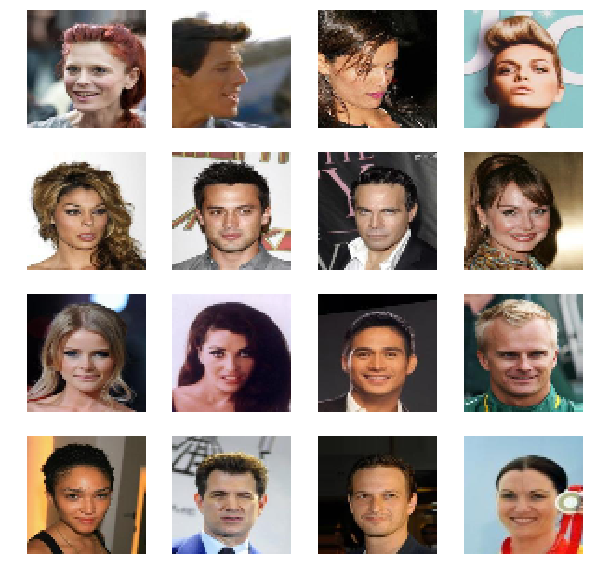

In [9]:
#visualize the preprocessed images

#convert the images back to 0-255 for visualization 

images2 = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) for i in images]
img_col = ImageCollector(np.asarray(images2))
img_col.show(np.asarray(images2))

In [10]:
#train the model - generator and discriminator 
from dcgan_model import DCGAN

tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(images), iters = 1500)


conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 107838
new size 107838
Step: 0, D_loss: 1.4879556894302368, G_loss: 0.4208177328109741
Step: 10, D_loss: 0.8927907943725586, G_loss: 1.1259074211120605
Step: 20, D_loss: 0.28489649295806885, G_loss: 2.7808337211608887
Step: 30, D_loss: 0.12776391208171844, G_loss: 4.45061731338501
Step: 40, D_loss: 0.08910022675991058, G_loss: 3.832977294921875
Step: 50, D_loss: 0.038141172379255295, G_loss: 6.799649238586426
Step: 60, D_loss: 0.033957339823246, G_loss: 8.778103828430176
Step: 70, D_loss: 0.08615429699420929, G_loss: 8.711045265197754
Step: 80, D_loss: 0.04411132633686066, G_loss: 6

Step: 1180, D_loss: 0.6870306730270386, G_loss: 3.882981777191162
Step: 1190, D_loss: 0.4304279685020447, G_loss: 3.8813281059265137
Step: 1200, D_loss: 0.3456946611404419, G_loss: 3.7185990810394287
Step: 1210, D_loss: 2.0277364253997803, G_loss: 3.2920925617218018
Step: 1220, D_loss: 0.2227715402841568, G_loss: 3.0076253414154053
Step: 1230, D_loss: 0.103443443775177, G_loss: 4.154731750488281
Step: 1240, D_loss: 0.3522109091281891, G_loss: 2.582911252975464
Step: 1250, D_loss: 0.7220609784126282, G_loss: 1.737600326538086
Step: 1260, D_loss: 1.2314568758010864, G_loss: 2.1234488487243652
Step: 1270, D_loss: 0.5010932683944702, G_loss: 4.098976135253906
Step: 1280, D_loss: 1.0972415208816528, G_loss: 3.5433855056762695
Step: 1290, D_loss: 0.36818578839302063, G_loss: 3.711373805999756
Step: 1300, D_loss: 1.3492622375488281, G_loss: 4.2515692710876465
Step: 1310, D_loss: 0.5638065338134766, G_loss: 3.511343002319336
Step: 1320, D_loss: 0.5035454630851746, G_loss: 2.017394542694092
Ste

In [11]:
# show the graph
from cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)
    
    
    

In [37]:
tf.train.get_checkpoint_state('checkpoints')

model_checkpoint_path: "checkpoints/DCGAN.ckpt"
all_model_checkpoint_paths: "checkpoints/DCGAN.ckpt"

In [38]:
checkpoint = tf.train.latest_checkpoint('checkpoints')


In [39]:
#Step 1 
#import the model metagraph
saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta', clear_devices=True)
#make that as the default graph
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
#now restore the variables
saver.restore(sess, "./checkpoints/DCGAN.ckpt")


INFO:tensorflow:Restoring parameters from ./checkpoints/DCGAN.ckpt


In [45]:
#Step 2
# Find the output name
graph = tf.get_default_graph()
for n in graph.as_graph_def().node: 
      print (n.name)


inputs/Placeholder
inputs/is_training
Placeholder
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/shape
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/min
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/max
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/RandomUniform
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/sub
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/mul
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform
Generator/fc_layer_g/g_fc_kernel_0
Generator/fc_layer_g/g_fc_kernel_0/Assign
Generator/fc_layer_g/g_fc_kernel_0/read
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/shape
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/min
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/max
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/RandomUniform
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uni

save/RestoreV2/shape_and_slices
save/RestoreV2
save/Assign
save/Assign_1
save/Assign_2
save/Assign_3
save/Assign_4
save/Assign_5
save/Assign_6
save/Assign_7
save/Assign_8
save/Assign_9
save/Assign_10
save/Assign_11
save/Assign_12
save/Assign_13
save/Assign_14
save/Assign_15
save/Assign_16
save/Assign_17
save/Assign_18
save/Assign_19
save/Assign_20
save/Assign_21
save/Assign_22
save/Assign_23
save/Assign_24
save/Assign_25
save/Assign_26
save/Assign_27
save/Assign_28
save/Assign_29
save/Assign_30
save/Assign_31
save/Assign_32
save/Assign_33
save/Assign_34
save/Assign_35
save/Assign_36
save/Assign_37
save/Assign_38
save/Assign_39
save/Assign_40
save/Assign_41
save/Assign_42
save/Assign_43
save/Assign_44
save/Assign_45
save/Assign_46
save/Assign_47
save/Assign_48
save/Assign_49
save/Assign_50
save/Assign_51
save/Assign_52
save/Assign_53
save/Assign_54
save/Assign_55
save/Assign_56
save/Assign_57
save/Assign_58
save/Assign_59
save/Assign_60
save/Assign_61
save/Assign_62
save/Assign_63
save/

train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/Conv2DBackpropFilter_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/Conv2DBackpropInput_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/tuple/group_deps_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/tuple/control_dependency_1_1
train_step_1/gradients/d_conv_layer_1_1/Conv2D_grad/tuple/control_dependency_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Select_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Sum_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Reshape_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Select_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Sum_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/Reshape_2
train_step_1/gradients/LeakyRelu_4/Maximum_grad/tuple/group_deps_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/tuple/control_dependency_1_1
train_step_1/gradients/LeakyRelu_4/Maximum_grad/tuple/control_dependency_2
train_step_1/gradients/LeakyRelu_4/mul_grad/Mul_1_1
train

In [56]:
#Step 3
from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

output_node_names=[v.op.name for v in tf.global_variables()] 

output_graph_def = graph_util.convert_variables_to_constants(
        sess, # The session
        input_graph_def, # input_graph_def is useful for retrieving the nodes 
        output_node_names)  

AssertionError:  Sigmoid_2 is not in graph

In [48]:
#Step 4
#output folder
output_fld ='./'
#output pb file name
output_model_file = 'model.pb'
from tensorflow.python.framework import graph_io
#write the graph
graph_io.write_graph(output_graph_def, output_fld, output_model_file, as_text=False)

'./model.pb'

In [50]:
def loadpb(filename, model_name='dcgan'):
        """Loads pretrained graph from ProtoBuf file
        Arguments:
            filename - path to ProtoBuf graph definition
            model_name - prefix to assign to loaded graph node names
        Returns:
            graph, graph_def - as per Tensorflow definitions
        """
        with tf.gfile.GFile(filename, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())

        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def,
                                input_map=None,
                                return_elements=None,
                                op_dict=None,
                                producer_op_list=None,
                                name=model_name)

        return graph, graph_def

In [52]:
loadpb('./model.pb',model_name='DCGAN' )

ValueError: Input 0 of node DCGAN/Generator/batch_norm_3/cond/ExponentialMovingAverage/AssignMovingAvg_1/Switch was passed float from DCGAN/Generator/batch_norm/Generator/batch_norm_3/moments/variance/ExponentialMovingAverage:0 incompatible with expected float_ref.

In [18]:
def add_noise(x, portion, amplitude):
        """
        Add random integer noise to self.x.
        :param portion: The portion of self.x samples to inject noise. If x contains 10000 sample and portion = 0.1,
                        then 1000 samples will be noise-injected.
        :param amplitude: An integer scaling factor of the noise.
        :return added: dataset with noise added
        """
        # TODO: Implement the add_noise function. Remember to record the
        # boolean value is_add_noise. You can try uniform noise or Gaussian
        # noise or others ones that you think appropriate.
        # raise NotImplementedError

        channels = 3
        num_of_samples = len(x)

        for i in range(num_of_samples):
            #in each sample, we need to shift for each channel
            random_boolean = np.random.choice(a=[True, False], size=1, p=[portion, 1-portion])

            if random_boolean == True:
                
                for j in range(channels):

                    mean = 0
                    std = 0.01
                    noise = amplitude * np.random.normal(mean, std, x[i,:,:,j].shape)
                    print(noise)
                    x[i,:,:,j] += noise


        return x 
